# 1. Download the dataset

# 2.Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Perform Below Visualizations

**Univariate Analysis**

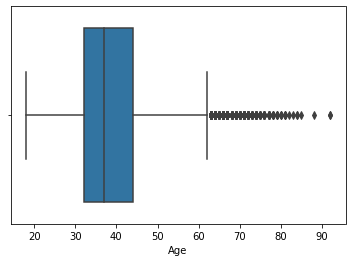

In [3]:
sns.boxplot(x='Age',data=data)
plt.show()

**Bi - Variate Analysis**

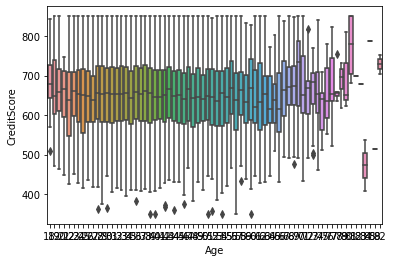

In [4]:
sns.boxplot(y=data.CreditScore, x=data.Age)
plt.show()

**Multi - Variate Analysis**

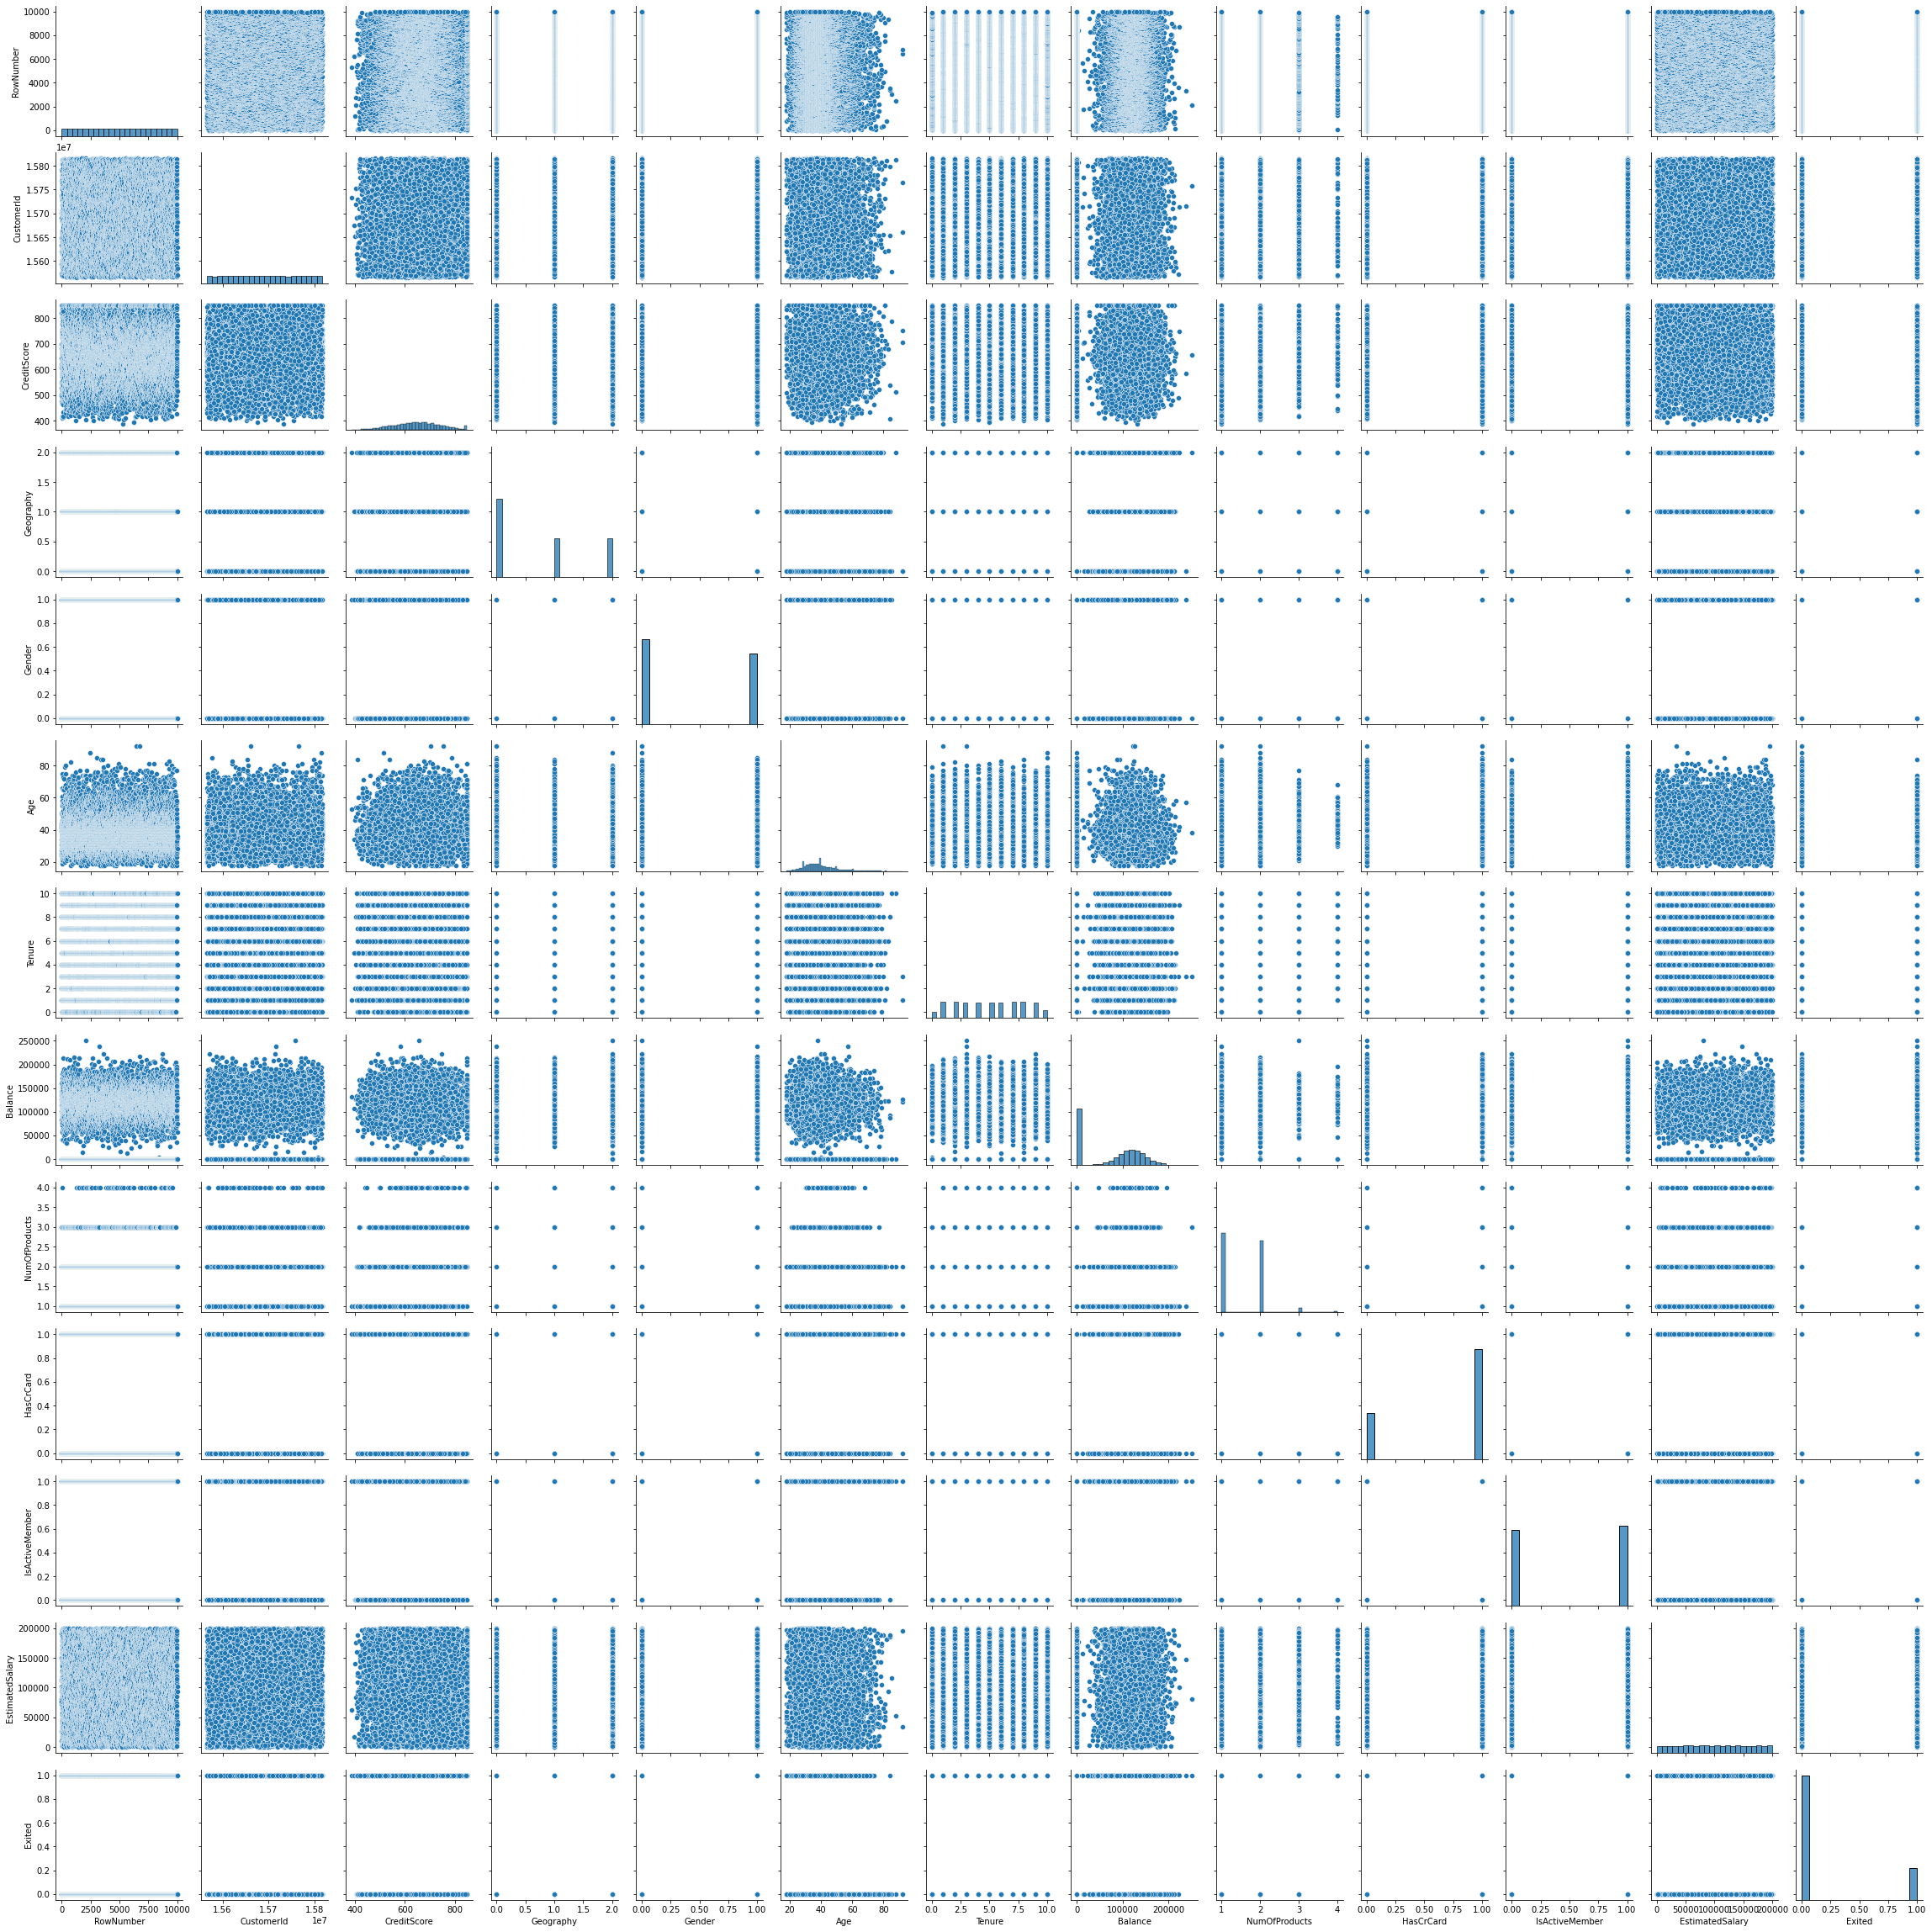

In [32]:
sns.pairplot(data)
plt.show()

# 4. Perform descriptive statistics on the dataset

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data['NumOfProducts'].mean()

1.5302

In [10]:
data['EstimatedSalary'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64>

In [11]:
data['Tenure'].mode()

0    2
Name: Tenure, dtype: int64

In [12]:
data.kurt(numeric_only=True)

RowNumber         -1.200000
CustomerId        -1.196113
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

In [13]:
data.var(numeric_only=True)

RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [14]:
data.std(numeric_only=True)

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

# 5. Handle the Missing values

In [15]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Find the outliers and replace the outliers 

Old Shape:  (10000, 14)
New Shape:  (9984, 14)


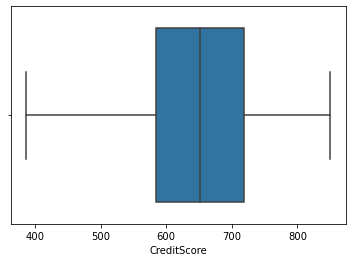

In [19]:
import sklearn
from sklearn.datasets import load_boston 

Q1 = np.percentile(data['CreditScore'], 25) 
Q3 = np.percentile(data['CreditScore'], 75) 
IQR = Q3 - Q1 
print("Old Shape: ", data.shape) 
upper = np.where(data['CreditScore'] >= (Q3+1.5*IQR)) 
lower = np.where(data['CreditScore'] <= (Q1-1.5*IQR)) 
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
print("New Shape: ", data.shape) 
sns.boxplot(x='CreditScore', data=data)
plt.show()


# 7. Check for Categorical columns and perform encoding

In [20]:
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of categorical variables: ", categorical_data.shape[1]) 
Cat_vars = list(categorical_data.columns)
Cat_vars

Number of categorical variables:  3


['Surname', 'Geography', 'Gender']

In [21]:
data['Geography'].value_counts()

France     5008
Germany    2505
Spain      2471
Name: Geography, dtype: int64

In [22]:
CleanGeo = {"Geography":{"France": 0, "Germany": 1, "Spain":2}}
data = data.replace(CleanGeo)
data['Gender'].value_counts()

Male      5450
Female    4534
Name: Gender, dtype: int64

In [23]:
CleanGen = {"Gender": {"Male": 0, "Female": 1}}
data = data.replace(CleanGen)
data.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       1   42   
1             2    15647311       Hill          608          2       1   41   
2             3    15619304       Onio          502          0       1   42   
3             4    15701354       Boni          699          0       1   39   
4             5    15737888   Mitchell          850          2       1   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       0   39   
9996       9997    15569892  Johnstone          516          0       0   35   
9997       9998    15584532        Liu          709          0       1   36   
9998       9999    15682355  Sabbatini          772          1       0   42   
9999      10000    15628319     Walker          792          0       1   28   

      Tenure    Balan

In [24]:
data.drop(columns=['Surname'], inplace=True)

# 8. Split the data into dependent and independent variables.

In [25]:
X = data.iloc[:, :-1].values
print(X)

[[1.0000000e+00 1.5634602e+07 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [26]:
Y = data.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


# 9. Scale the independent variables

In [27]:
from sklearn.preprocessing import StandardScaler
 
object= StandardScaler()
 
# standardization 
scale = object.fit_transform(X) 
print(scale)

[[-1.73288491 -0.7826587  -0.33310933 ...  0.64635829  0.96941773
   0.02294   ]
 [-1.73253834 -0.60597566 -0.44765115 ... -1.54712953  0.96941773
   0.21755163]
 [-1.73219178 -0.99533453 -1.55141782 ...  0.64635829 -1.03154705
   0.24170036]
 ...
 [ 1.73173087 -1.47874178  0.60405105 ... -1.54712953  0.96941773
  -1.00740094]
 [ 1.73207743 -0.11878701  1.26006332 ...  0.64635829 -1.03154705
  -0.12415028]
 [ 1.732424   -0.87000621  1.46832118 ...  0.64635829 -1.03154705
  -1.07511523]]


# 10. Split the data into training and testing 

In [28]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)